In [2]:
import glob
import os
import collections
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
from matplotlib.path import Path
import re
import json
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append('../../src')
import lib.taxonomy_tools as taxonomy_tools
import lib.fasta_tools as fasta_tools
import lib.ppk2_tools as ppk2_tools
from lib.json_ppk2_parser import Ppk2JsonParser
from lib.cdhit_parser import CDHit_Parser

import lib.common as common
common.set_environment_variable()
plt.rcParams["font.size"] = 12.5
plt.rcParams["figure.dpi"] = 400
plt.rcParams["figure.figsize"] = [4,4]

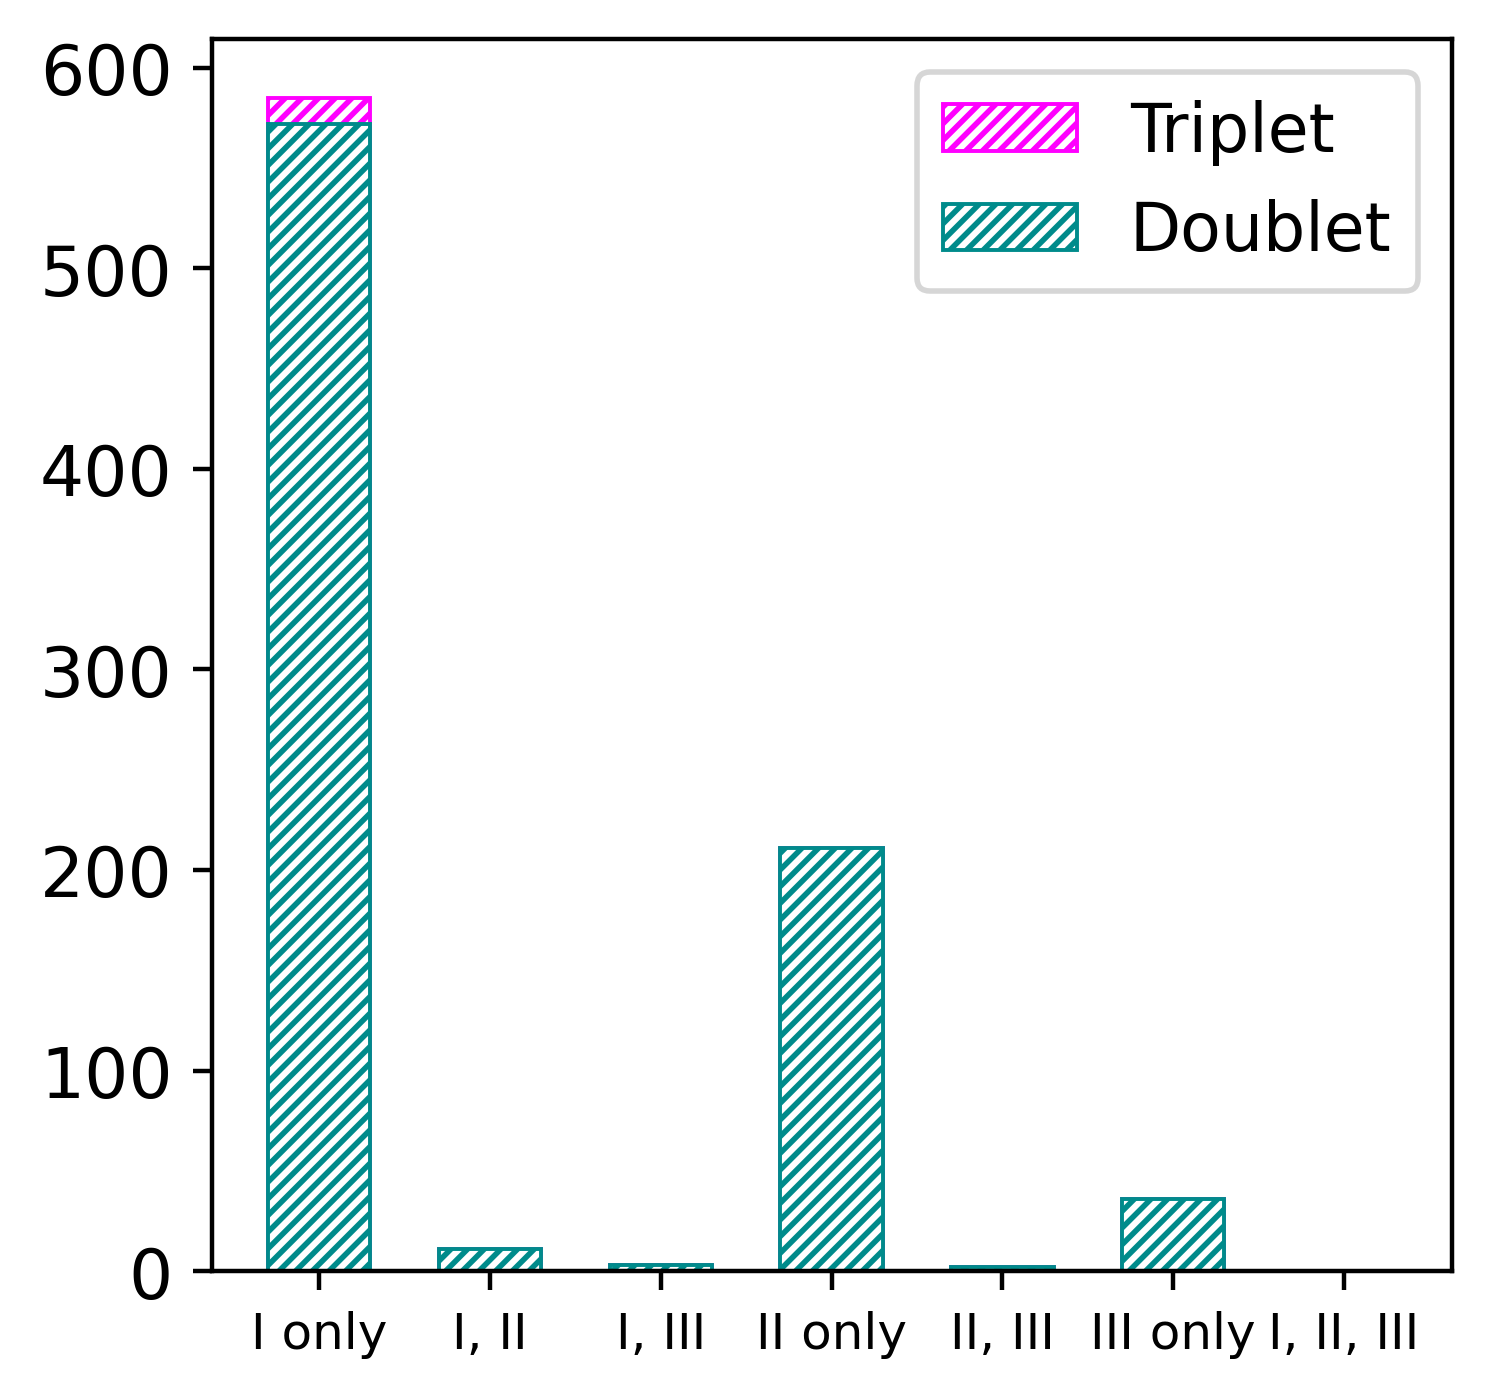

In [3]:
c1c1_d=0; c1c2_d=0; c1c3_d=0; c2c2_d=0; c2c3_d=0; c3c3_d=0
c1c1_t=0; c1c2_t=0; c1c3_t=0; c2c2_t=0; c2c3_t=0; c3c3_t=0
c1c2c3 = 0 
df_ppk2_all = ppk2_tools.create_ppk2_describe_df()
org_accession_list = list(set(df_ppk2_all.org_accession))
for org_accession in org_accession_list:
    df_tmp = df_ppk2_all[df_ppk2_all['org_accession'] == org_accession]
    df_duplicate = df_tmp[df_tmp['ppk2_duplicate'] == 1]
    if not df_duplicate.empty:
        if len(df_duplicate.index) == 2:
            if set(df_duplicate.ppk2_class) == {1}:
                c1c1_d += 1
            elif set(df_duplicate.ppk2_class) == {2}:
                c2c2_d += 1
            elif set(df_duplicate.ppk2_class) == {3}:
                c3c3_d += 1
            elif set(df_duplicate.ppk2_class) == {1,2}:
                c1c2_d += 1
            elif set(df_duplicate.ppk2_class) == {1,3}:
                c1c3_d += 1
            elif set(df_duplicate.ppk2_class) == {2,3}:
                c2c3_d += 1
            else:
                print('error')
        elif len(df_duplicate.index) == 3:
            if set(df_duplicate.ppk2_class) == {1}:
                c1c1_t += 1
            elif set(df_duplicate.ppk2_class) == {2}:
                c2c2_t += 1
            elif set(df_duplicate.ppk2_class) == {3}:
                c3c3_t += 1
            elif set(df_duplicate.ppk2_class) == {1,2}:
                c1c2_t += 1
            elif set(df_duplicate.ppk2_class) == {1,3}:
                c1c3_t += 1
            elif set(df_duplicate.ppk2_class) == {2,3}:
                c2c3_t += 1
            elif set(df_duplicate.ppk2_class) == {1,2,3}:
                c1c2c3 += 1
            else:
                print('error')
        elif len(df_duplicate.index) == 4:
            if set(df_duplicate.ppk2_class) == {1}:
                c1c1_d += 2
            elif set(df_duplicate.ppk2_class) == {2}:
                c2c2_d += 2
            elif set(df_duplicate.ppk2_class) == {3}:
                c3c3_d += 2
            elif set(df_duplicate.ppk2_class) == {1,2}:
                c1c2_d += 2
            elif set(df_duplicate.ppk2_class) == {1,3}:
                c1c3_d += 2
            elif set(df_duplicate.ppk2_class) == {2,3}:
                c2c3_d += 2
            elif set(df_duplicate.ppk2_class) == {1,2,3}:
                c1c2c3 += 1
            else:
                print('error')
        else:
            print('error')

bar_width = 1.2
x = np.array([1.5,3,4.5,6,7.5,9,10.5])
x = np.array([2,4,6,8,10,12,14])

x_obs = x + bar_width/2
y_obs_onecopy = np.array([c1c1_d,c1c2_d,c1c3_d,c2c2_d,c2c3_d,c3c3_d,c1c2c3])
y_obs_repeatcopy = np.array([c1c1_d+c1c1_t,c1c2_d+c1c2_t,c1c3_d+c1c3_t,c2c2_d+c2c2_t,c2c3_d+c2c3_t,c3c3_d+c3c3_t,c1c2c3]) 
fig,ax = plt.subplots(figsize = (4,4))
plt.xticks(x,["I only","I, II","I, III","II only","II, III","III only","I, II, III"],fontsize=9)
ax.bar(x,y_obs_repeatcopy,label='Triplet',width=bar_width,color='w',edgecolor='Magenta',linewidth=0.7,hatch='////////')
ax.bar(x,y_obs_onecopy,label='Doublet',width=bar_width,color="w",edgecolor="#008B8B",linewidth=0.7,hatch='////////')
plt.legend(prop={'size': 12})




In [ ]:
#adjacent
df_ppk2_all = ppk2_tools.create_ppk2_describe_df()
df_identity = pd.DataFrame(columns=['org_accession','identity'])
identity_dict_list = []
org_accession_list = list(set(df_ppk2_all.org_accession))
for org_accession in org_accession_list:
    df_tmp = df_ppk2_all[df_ppk2_all['org_accession'] == org_accession]
    df_duplicate = df_tmp[df_tmp['ppk2_duplicate'] == 1]
    if len(df_duplicate.index) == 2:
        with open('/tmp/tmp1.fasta','w') as tmpfile:
            tmpfile.write(f">{df_duplicate.index[0]}\n{df_duplicate.iloc[0,6]}\n")
            tmpfile.write(f">{df_duplicate.index[1]}\n{df_duplicate.iloc[1,6]}\n")
            
        os.system("mafft-linsi /tmp/tmp1.fasta > /tmp/tmp2.fasta")
        with open("/tmp/tmp2.fasta") as tmp2file:
            lines = tmp2file.readlines()
            flag = 0
            score = 0
            sequence = ''
            accessions = []
            sequences = []
            for line in lines:
                if line[0] == '>' and flag == 1:
                    accessions.append(line[1:-1])
                    sequences.append(sequence)
                    sequence = ''
                elif line[0] == '>':
                    accessions.append(line[1:-1])
                    flag = 1
                else:
                    sequence += line[:-1]
            sequences.append(sequence)
            print(sequences)
            seq1 = sequences[0]
            seq2 = sequences[1]
            for site in range(len(seq1)):
                if seq1[site] == seq2[site]:
                    score += 1
            identity = score/len(seq1)*100
            identity_dict_list.append({'org_accession':org_accession,'identity':identity, 'No1_class':df_duplicate.iloc[0,9], 'No2_class':df_duplicate.iloc[1,9], 'No1_length':df_duplicate.iloc[0,4], 'No2_length':df_duplicate.iloc[1,4]})
df_identity = pd.DataFrame(identity_dict_list)
class1_identity = df_identity.query('No1_class == 1 and No2_class == 1').identity.to_list() 
class2_identity = df_identity.query('No1_class == 2 and No2_class == 2').identity.to_list() 
class3_identity = df_identity.query('No1_class == 3 and No2_class == 3').identity.to_list() 

       

#random sampling
df_class1_adjacent = df_identity.query('No1_class == 1 and No2_class == 1')
df_class2_adjacent = df_identity.query('No1_class == 2 and No2_class == 2')
df_class3_adjacent = df_identity.query('No1_class == 3 and No2_class == 3')
random_identity_dict_list = []
adjacent_num_list = [len(df_class1_adjacent),len(df_class2_adjacent),len(df_class3_adjacent)]
for idx,adjacent_org_num_byclass in enumerate(adjacent_num_list):
    ppk2_class = idx + 1
    df_ppk2_class =  df_ppk2_all.query(f"ppk2_class == {ppk2_class}")
    for org_num in range(adjacent_org_num_byclass):
        df_ppk2_random = df_ppk2_class.sample(n=2)
        with open('/tmp/tmp1.fasta','w') as tmpfile:
            tmpfile.write(f">{df_ppk2_random.index[0]}\n{df_ppk2_random.iloc[0,6]}\n")
            tmpfile.write(f">{df_ppk2_random.index[1]}\n{df_ppk2_random.iloc[1,6]}\n")
            
        os.system("mafft-linsi /tmp/tmp1.fasta > /tmp/tmp2.fasta")
        with open("/tmp/tmp2.fasta") as tmp2file:
            lines = tmp2file.readlines()
            flag = 0
            score = 0
            sequence = ''
            accessions = []
            sequences = []
            for line in lines:
                if line[0] == '>' and flag == 1:
                    accessions.append(line[1:-1])
                    sequences.append(sequence)
                    sequence = ''
                elif line[0] == '>':
                    accessions.append(line[1:-1])
                    flag = 1
                else:
                    sequence += line[:-1]
            sequences.append(sequence)
            print(sequences)
            seq1 = sequences[0]
            seq2 = sequences[1]
            for site in range(len(seq1)):
                if seq1[site] == seq2[site]:
                    score += 1
            identity = score/len(seq1)*100
            random_identity_dict_list.append({'No1_accession':df_ppk2_random.iloc[0,0],'No2_accession':df_ppk2_random.iloc[0,1],'identity':identity, 'No1_class':df_ppk2_random.iloc[0,9], 'No2_class':df_ppk2_random.iloc[1,9], 'No1_length':df_ppk2_random.iloc[0,4], 'No2_length':df_ppk2_random.iloc[1,4]})
df_random_identity = pd.DataFrame(random_identity_dict_list)
class1_random_identity = df_random_identity.query('No1_class == 1 and No2_class == 1').identity.to_list() 
class2_random_identity = df_random_identity.query('No1_class == 2 and No2_class == 2').identity.to_list() 
class3_random_identity = df_random_identity.query('No1_class == 3 and No2_class == 3').identity.to_list() 

plt.rcParams["font.size"] = 12.5
fig,axes = plt.subplots(3,1,sharex=True)
fig.subplots_adjust(hspace=0.2)
fig.patch.set_color("white")
axes[0].hist(class1_random_identity,bins=50,color="silver",label="Class I (random)")
axes[1].hist(class2_random_identity,bins=50,color="silver",label="Class II (random)")
axes[2].hist(class3_random_identity,bins=50,color="silver",label="Class III (random)")
axes[0].hist(class1_identity,bins=50,color="blue",label="Class I (adjacent)",alpha=0.5)
axes[1].hist(class2_identity,bins=50,color="green",label="Class II (adjacent)",alpha=0.5)
axes[2].hist(class3_identity,bins=50,color="red",label="Class III (adjacent)",alpha=0.5)
axes[0].legend(prop={'size': 8.5})
axes[1].legend(prop={'size': 8.5})
axes[2].legend(prop={'size': 8.5})







In [ ]:
ppk2_table = ppk2_tools.create_ppk2_describe_df()
ppk2_class2_single_table = ppk2_table.query('ppk2_class == 2').query('gene_annotation_by_domain == "PPK2"')
ppk2_class2_single_list = list(ppk2_class2_single_table.index)
ppk2_class2_single_set = set(ppk2_class2_single_list)

N_term_rep_list = []
C_term_rep_list = []
N_term_single_list = []
C_term_single_list = []
with open('../data/N_term.txt') as read_file:
    while True:
        line = read_file.readline()
        line = re.sub(' ','_',line)
        line = re.sub("'",'',line)[:-3]   
        if not line:
            break
        else:
            N_term_rep_list.append(line)
with open('../data/N_term_and_C_term.txt') as read_file:
    while True:
        line = read_file.readline()
        line = re.sub(' ','_',line)
        line = re.sub("'",'',line)[:-3]
        if not line:
            break
        else:
            if line not in set(N_term_rep_list):
                C_term_rep_list.append(line)
            else:
                pass
cdhit_parser = CDHit_Parser(os.environ["PPK2_rep_clstr"])

N_term_single_rep_set = set(N_term_rep_list) & ppk2_class2_single_set
C_term_single_rep_set = set(C_term_rep_list) & ppk2_class2_single_set

ppk2_rep_dict = cdhit_parser.parse_one_file()
ppk2_values_list = list(ppk2_rep_dict.values())
for N_term_single_rep in list(N_term_single_rep_set):
    for ppk2_values in ppk2_values_list:
        if N_term_single_rep in ppk2_values:
            N_term_single_list += ppk2_values
            break

for C_term_single_rep in list(C_term_single_rep_set):
    for ppk2_values in ppk2_values_list:
        if C_term_single_rep in ppk2_values:
            C_term_single_list += ppk2_values
            break

N_term_single_set = set(N_term_single_list)
C_term_single_set = set(C_term_single_list)
single_single_set = ppk2_class2_single_set - (N_term_single_set|C_term_single_set)

#doublet のみ
domain_pair_list = []
ppk2_table = ppk2_tools.create_ppk2_describe_df()
org_accession_list = list(set(ppk2_table.org_accession))
for org_accession in org_accession_list:
    df_tmp = ppk2_table[ppk2_table['org_accession'] == org_accession]
    df_duplicate = df_tmp[df_tmp['ppk2_duplicate'] == 1]
    if not df_duplicate.empty:
        if len(df_duplicate.index) == 2:
            duplicate_gene_list = list(df_duplicate.index)
            no_1_gene = duplicate_gene_list[0]
            no_2_gene = duplicate_gene_list[1]     
            if set(df_duplicate.ppk2_class) != {2}:
                continue
            if (no_1_gene in N_term_single_set) and (no_2_gene in N_term_single_set):
                domain_pair_list.append('N - N')
            elif (no_1_gene in C_term_single_set) and (no_2_gene in C_term_single_set):
                domain_pair_list.append('C - C')
            elif (no_1_gene in single_single_set) and (no_2_gene in single_single_set):
                domain_pair_list.append('U - U')               
            elif ((no_1_gene in C_term_single_set) and (no_2_gene in N_term_single_set)) or ((no_1_gene in N_term_single_set) and (no_2_gene in C_term_single_set)):
                domain_pair_list.append('N - C')
            elif ((no_1_gene in single_single_set) and (no_2_gene in N_term_single_set)) or ((no_1_gene in N_term_single_set) and (no_2_gene in single_single_set)):
                domain_pair_list.append('N - U')  
            elif ((no_1_gene in C_term_single_set) and (no_2_gene in single_single_set)) or ((no_1_gene in single_single_set) and (no_2_gene in C_term_single_set)):
                domain_pair_list.append('U - C')  
            else:
                domain_pair_list.append('- -')  

domain_pair_counter = collections.Counter(domain_pair_list)  
sorted_pair = sorted(dict(domain_pair_counter).items(), key=lambda x:x[1],reverse=True)
pair_x_list = []
pair_xlabel_list = []
pair_y_list = []
for idx,pair in enumerate(sorted_pair):
    pair_x_list.append(idx)
    pair_xlabel_list.append(pair[0])
    pair_y_list.append(pair[1])        

bar_width = 0.8
df_class2_duplicate = df_identity.query('No1_class == 2 and No2_class == 2')
df_class2 = df_ppk2_all.query('ppk2_class == 2')
x1 = np.array(list(df_class2_duplicate['No1_length']) + list(df_class2_duplicate['No2_length']))
x2 = np.array(list(df_class2['gene_length']))
fig,ax = plt.subplots(2,1)
plt.subplots_adjust(wspace=0.4, hspace=0.6)
ax_right = ax[0].twinx()
ax[0].hist(x1,bins=30,histtype='stepfilled',fill=False,ec= 'green',label='ClassII PPK2 (adjacent)')
ax_right.hist(x2,bins=60,histtype='stepfilled',fill=False,ec= 'k',label='ClassII PPK2 (all)')
ax[1].set_xticks(pair_x_list,pair_xlabel_list)
ax[1].bar(pair_x_list,pair_y_list,label='Adjacent Class II PPK2 pairs',width=bar_width,color="green")